In [9]:
import numpy as np
import math
import line_profiler
%load_ext line_profiler
import matplotlib.pyplot as plt

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [67]:
def lp_norm_sketch(A, k, n, _lambda, _epsilon):
    # compute the number of counters we need
    c1 = 23
    s1 = math.ceil(c1*(k*n**(1-1/k)-1)/(_lambda**2))
    s2 = math.ceil(2/c1/((1/2-1/c1)**2) *math.log(1/_epsilon))
    print(s1*s2)
    
    X = np.zeros((s2, s1))  # the random element we care about
    r = np.zeros((s2, s1))  # stores the frequency count
    
    for cnt, a in enumerate(A):
        # since we don't know m in advance, we
        # update X and r as we go
        # when we encounter the m-th element, we update w.p. 1/m
        to_change = np.random.rand(s2, s1) < 1/(1+cnt)
        X[to_change] = a
        r[to_change] = 0  # reset counter as needed
        r[X == a] += 1
    
    return np.median(np.mean((cnt+1)*(r**k - (r-1)**k), axis=1), axis=0)

In [14]:
np.random.randint(5, size=(5,3)) == 0

array([[False, False,  True],
       [ True,  True, False],
       [False, False,  True],
       [ True, False,  True],
       [False, False, False]])

In [15]:
a = np.random.rand(4, 3, 10)
print(np.sum(a, axis=1).shape)
print(np.median(np.sum(a, axis=1), axis=0).shape)


(4, 10)
(10,)


In [65]:
n = 50
m = 10000
A = np.random.randint(n, size=(m, ))
A

array([37, 35, 23, ..., 13, 25, 48])

In [21]:
# A = np.arange(1000)

In [63]:
uniq, cnts = np.unique(A, return_counts=True)
k = 2
np.sum(cnts**k)

20754

In [8]:
[20692.239703022802,   #c1=8
 20796.888810323493,
 20756.93830652289,
 20749.690648753756,
 20720.34647339579,
 20882.269754286724,
 20721.230334099346,
 20739.79140887396,
 20791.408873961464,
 20805.550645218314]


[20863.31355489286,   #c1=23 "optimal"
 20660.097764933747,
 20921.17317920497,
 20859.931749008516,
 20688.873858640512,
 20667.90666215759,
 20766.96283087896,
 20757.247824883943,
 20571.986349801704,
 20826.236664924523]

In [64]:
[lp_norm_sketch(A, k, n, 0.1, 0.1) for i in range(10)]

32527
32527
32527
32527
32527
32527
32527
32527
32527
32527


[20798.87478095121,
 20754.54238017647,
 20743.966550865436,
 20688.8123712608,
 20770.898023180744,
 20776.30891259569,
 20720.04796015618,
 20837.673317551573,
 20789.098287576475,
 20702.647031696742]

In [68]:
%lprun -f lp_norm_sketch lp_norm_sketch(A, k, n, 0.1, 0.1)

30227


In [94]:
def test_lp_norm_correctness(A, k, n, _lambda, _epsilon, printOut=True):
    uniq, cnts = np.unique(A, return_counts=True)
    true = np.sum(cnts**k)
    
    estimate = lp_norm_sketch(A, k, n, 0.1, 0.1)
    
    if printOut:
        print("""Testing on array of length {} with parameters k={}, n={}, lambda={}, epsilon={}\n
True value: {:.2f} Estimate: {:.2f} Error range: ({:.2f}, {:.2f}) w.p. {:.2f}\n\nWITHIN RANGE? {}\n\n"""
          .format(len(A), k, n, _lambda, _epsilon, true, estimate, (1-_lambda)*true, (1+_lambda)*true, 1-_epsilon,
          abs(1 - estimate/true) < _lambda))
    
    return true, estimate, abs(1 - estimate/true) < _lambda

In [91]:
test_lp_norm_correctness(A, k, n, 0.2, 0.1)

Testing on array of length 10000 with parameters k=2, n=50, lambda=0.2, epsilon=0.1
True value: 2009634.00 Estimate: 2008766.75 Error range: (1607707.20, 2411560.80) w.p. 0.90

WITHIN RANGE? True




(2009634, 2008766.7539331801)

In [92]:
def run_random_tests(n, m, k, _lambda = 0.1, _epsilon = 0.1, trials=100):
    true = []
    estimate = []
    correct = []
    
    for i in range(trials):
        A = np.random.randint(n, size=(m, ))
        t, e, c = test_lp_norm_correctness(A, k, n, _lambda, _epsilon, printOut=False)
        true.append(t)
        estimate.append(e)
        correct.append(c)
        
    print(sum(correct)/trials, 1-_epsilon)
    
    return true, estimate, correct

In [96]:
run_random_tests(10, 50, 2, trials=10000)

1.0 0.9


In [ ]:
class lp_norm_sketch():
    def __init__(self, k, n, _lambda, _epsilon, stream=None):
        """
            Optionally pass in a pre-existing stream or to sample elements from
        """
        self.k = k
        self.n = n
        self.lambda = _lambda
        self.epsilon = _epsilon
        self.stream = stream
        
        self.s1 = math.ceil(8*k*n**(1-1/k)/(_lambda**2))
        self.s2 = math.ceil(2*math.log(1/_epsilon))

        self.X = np.zeros((s2, s1))  # the random element we care about
        self.r = np.zeros((s2, s1))  # stores the frequency count
        
        self.m = 0
        

    def see(val=None):
        """processes the next element of the stream"""
        if val is None:
            if stream is None:
                raise Exception("No stream or value provided")
            
            val = next(stream)

        self.m += 1

        to_change = np.random.rand(self.s2, self.s1) < 1/m
        self.X[to_change] = a
        self.r[to_change] = 0  # reset counter as needed
        self.r[X == a] += 1
        
        
    def estimate():
        return np.median(np.mean(self.m*(self.r**self.k - (self.r-1)**self.k), axis=1), axis=0)
        

In [60]:
_lambda = 0.1
_epsilon = 0.1
k = 2
n = 50
for c1 in range(4, 100):
    s1 = math.ceil(c1*k*n**(1-1/k)/(_lambda**2))
    s2 = math.ceil(2/c1/((1/2-1/c1)**2) *math.log(1/_epsilon))
    print(s1*s2)
    if s2 == 1: break
        
print(c1)

107483
77792
59402
59400
56570
50912
42429
46671
50913
36770
39598
42428
45256
48084
50912
53742
56570
59398
62226
32527
23


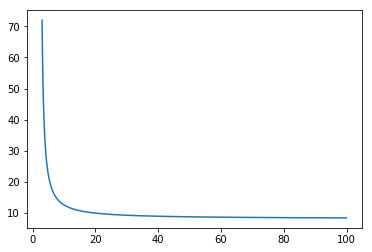

In [31]:
c1 = np.arange(3.0, 100.0, 0.05)
c2 = 2/c1/((1/2-1/c1)**2)
plt.plot(c1, c1*c2)
plt.show()

In [70]:
ms = 1 + np.arange(m)

tight = 

array([1, 2, 3, 4])